### Student Details

Student name: Cathaoir Agnew

Student ID: 16171659

# Task 2: Dimensionality Reduction via PCA

PCA is one of the most commonly used unsupervised transforms, and one of the most commmon means to manipulate data for machine learning. You touched on the PCA in E-tivity 2, where we investigated linear algebra. Here we will use it to reduce the numbers of features needed for a machine learning algorithm.

In the last task, we removed features. The first part, we just used some statistics on the features themselves, in independence of the other features and of the output. Then, we looked at the correlation between features and the output. 

What PCA does is look at correlations *between features*. If we have high correlation between two or more features, PCA will find vectors in the feature space that best describe all features. It doesn't remove features, rather it creates a new feature space, and projects all samples to this feature space. The basis of the new feature space is a linear combination of the original features. Maybe a bit crudely, you can think of it as combining features.

Let's look at an example. Here is the first few rows of the `Hitters` dataset.

In [1]:
import pandas as pd
df = pd.read_csv('Hitters_train.csv', header=0)
df.head(8)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,Kent Hrbek,550,147,29,85,91,71,6,2816,815,117,405,474,319,1218,104,10,1310.0
1,Steve Buechele,461,112,18,54,54,35,2,680,160,24,76,75,49,111,226,11,135.0
2,Terry Kennedy,19,4,1,2,3,1,1,19,4,1,2,3,1,692,70,8,920.0
3,Jim Presley,616,163,27,83,107,32,3,1437,377,65,181,227,82,110,308,15,200.0
4,Ken Landreaux,283,74,4,34,29,22,10,3919,1062,85,505,456,283,145,5,7,737.5
5,Mike Diaz,209,56,12,22,36,19,2,216,58,12,24,37,19,201,6,3,90.0
6,Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0
7,Phil Garner,313,83,9,43,41,30,14,5885,1543,104,751,714,535,58,141,23,450.0


Look at all the features (columns) with a C at the front of the name. These are all *career* statistics - that is the total number of hits, home runs, etc., over the course of the player's career. Let's plot some of them against years. Because they are career statistics, they are quite likely to be correlated with the number of years played. Let's plot a few of them against the years played.

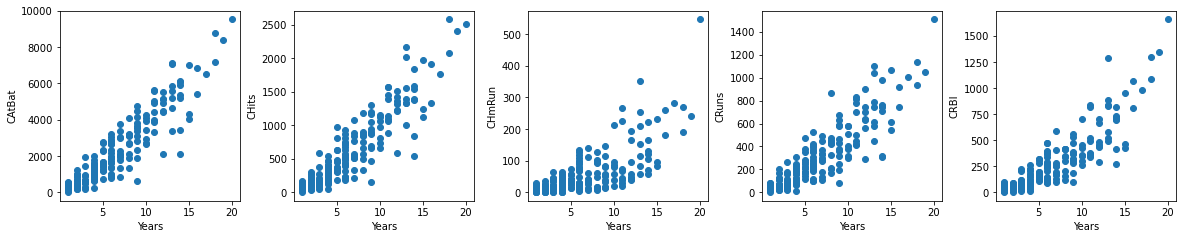

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(20, 3.5))
fig.subplots_adjust(wspace=0.3)

for i in range(0,5):
    ax[i].scatter(df.iloc[:, 7], df.iloc[:, 8+i]);
    ax[i].set(xlabel=df.columns[7], ylabel=df.columns[8+i])

plt.show()

Yes, we can see that there is some correlation between the years played and these career statistics. We can probably assume that the causal relationship is simply this: if you have been playing for a long time, you are more likely to accumulate higher career statistics.

So there is certainly some redundancy here.

There may be additional correlattions, that are maybe not as obvious. Let's plot some of the statistics against the `CHits` statistic.

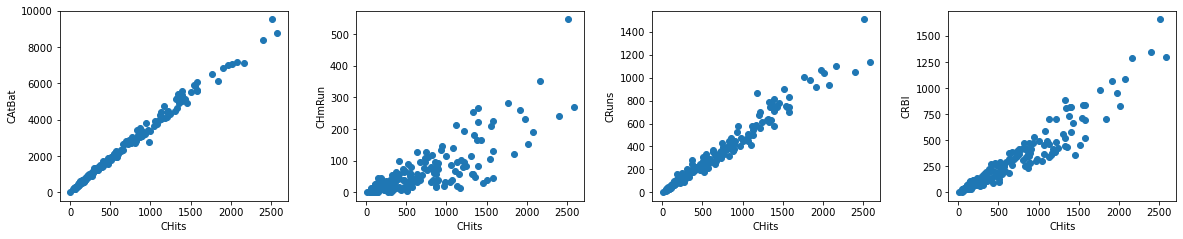

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(20, 3.5))
fig.subplots_adjust(wspace=0.3)

cols = [8,10,11,12]
for i in range(0,4):
    ax[i].scatter(df.iloc[:, 9], df.iloc[:, cols[i]]);
    ax[i].set(xlabel=df.columns[9], ylabel=df.columns[cols[i]])

plt.show()

Well, it would seem that we have at least a couple of very correlated statistics. The correlation between `CAtBat` (the number of times a player steps up to bat) versus `CHits` makes sense. The more times a player tries to hit, the more times a player will hit. The more times a player hits, the more Runs a player will get.

But we might also think that there is a causal relationship, and thus a strong correlation, between the number of hits in a players career `CHits`, and the the number of home runs `CHmRun`. And, there is. A player that has rarely hit will not get many home runs. But the correlation is not so strong. There are some players with many hits, but few home runs, for example.

What has been discussed is not very precise, as I'm trying to give an intuitive feel for the correlations between features. We could of course measure the correlation between features. The equation for correlation was given in the first task Jupyter Notebook, except it measured correlation of a feature $\textbf{X}^{(i)}$ against the outcomes $\textbf{y}$, salary in this case. It's easy here to replace $\textbf{y}$ with one of the other features $\textbf{X}^{(h)}$.

In fact, this is more or less what PCA does. Recall from e-tivity 2 that one of the steps of PCA is to compute the *covariance matrix*. This matrix contains the covariance between two variables (variables in this case being the features of our dataset). And [covariance and correlation are very similar](https://en.wikipedia.org/wiki/Covariance_and_correlation).

Let's have a look at one more example. Consider that we had a dataset only of `CHits`, `CRuns` and `CAtBat`. As discussed, it seems intuitive that the three are related. The more times you are at bat, the more hits you will make, and the more runs you will get. Let's plot this in 3D.

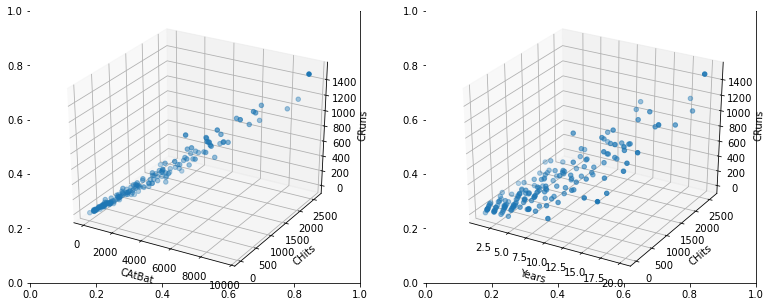

In [4]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(13, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df.iloc[:, 8], df.iloc[:, 9], df.iloc[:, 11])
ax1.set(xlabel=df.columns[8], ylabel=df.columns[9], zlabel=df.columns[11])

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df.iloc[:, 7], df.iloc[:, 9], df.iloc[:, 11])
ax2.set(xlabel=df.columns[7], ylabel=df.columns[9], zlabel=df.columns[11])

plt.show()

We can see that our intuition in this case is pretty good. There seems to be a highly linear relationship between the three features, `CHits`, `CRuns` and `CAtBat`. We should expect a PCA in this case to pick a 1D subspace that would describe this 3D feature space nicely.

In contrast, the second figure on the right, in which `CAtBat` is replaced with `Years` is not as clean. It would certainly appear that there is a relationship, but probably a 2D subspace in this case would be more appropriate.

A PCA will find these relationships, and those with higher dimensions than we can visualise here. It's what it is designed to do.

A final note: At no point do we look at the target variable $\mathbf{y}$ when doing PCA. This makes it an applicable filter for data for both *supervised* and *unsupervised* machine learning algorithms, as well as being an *unsupervised* machine learning algorithm itself.

# Task

On to this weeks task. We will perform PCA on the Hitters data, before training a linear SVM, and explore some more properties of it, and how it affects the machine learning algorithm.

1. Run [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standard scaled data. Initially, set the desired variance to keep to 95% (`n_components=0.95`, all other parameters set to default)
2. Train a [Support Vector Regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) on the PCA reduced data. As with Task 1, use a linear SVM and keep all other parameters as default

Discuss the following points, and compare with the previous task in this e-tivity:

1. How many new features are there after the PCA?
2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the [root-mean-squared-error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
3. How about if we set the variance to 99%? And how about 99.9%?

Note that the parameter `n_components` of `PCA` can take either a real value between 0 and 1, in which case it will pick the number of components that maintains that level of variance in the samples, or it can take an integer value, in which case it will keep that number of components.

In [5]:
# (given)
import pandas as pd

df_train = pd.read_csv('Hitters_train.csv', header=0)
df_test = pd.read_csv('Hitters_test.csv', header=0)

X_train = df_train.iloc[:, 1:17].values
y_train = df_train.iloc[:, 17].values

X_test = df_test.iloc[:, 1:17].values
y_test = df_test.iloc[:, 17].values

In [6]:
# (given)
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler().fit(X_train)
sc_y = StandardScaler().fit(y_train.reshape(-1, 1))

X_train_std = sc_X.transform(X_train)
X_test_std = sc_X.transform(X_test)
y_train_std = sc_y.transform(y_train.reshape(-1, 1))

## 1. How many new features are there after the PCA?

Needs to run twice, error comes up about SVD not converging on first run. Worked fine when I brought this to google colab, no SVD error on first run. This might be some weird error on my anaconda jupyter notebook. I had asked Ciaran about this on the forum.

---------------------**Simply rerun the cell with PCA to fix non-convergence problem**----------------------

In [10]:
from sklearn.decomposition import PCA

# PCA set for 95% of variance 
pca = PCA(n_components=0.95)

pca.fit(X_train_std)

PCA(n_components=0.95)

The print staments below answer above Q1. PCA creates a new features space of 7 features, when n_compontents = 0.95. That is setting the desired variance to keep to 95%

In [11]:
# PCA set for 95% of variance  

X_train_scale_pca = pca.transform(X_train_std)
X_test_scale_pca = pca.transform(X_test_std)

# quick print of shapes to see difference
print(f'Train data:\nBefore pca shape: {X_train_std.shape} , after pca applied: {X_train_scale_pca.shape} ')
print(f'\nTest data:\nBefore pca shape: {X_test_std.shape} , after pca applied: {X_test_scale_pca.shape} ')

Train data:
Before pca shape: (184, 16) , after pca applied: (184, 7) 

Test data:
Before pca shape: (79, 16) , after pca applied: (79, 7) 


In [12]:
from sklearn.svm import SVR


svm_reg = SVR(kernel='linear')

# again using hint 2 from task 1 to reshape y data
svm_reg.fit(X_train_scale_pca , y_train_std.T[0])

y_pred_scale = svm_reg.predict(X_test_scale_pca)

# convert this back to non scaled values using inverse transform
y_pred = sc_y.inverse_transform(y_pred_scale)

In [13]:
from sklearn.metrics import mean_squared_error

print("SVR root mean square error: " , mean_squared_error(y_test, y_pred, squared = False) )

SVR root mean square error:  450.1811170847186


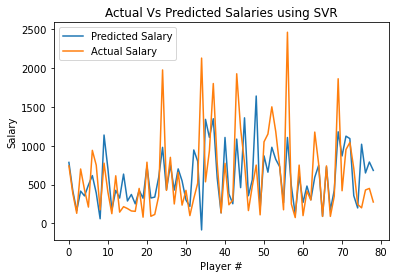

In [14]:
plt.title('Actual Vs Predicted Salaries using SVR')
plt.xlabel("Player #")
plt.ylabel("Salary")

# plotting salaries for both predicted & actual
plt.plot(y_pred , label = "Predicted Salary")
plt.plot(y_test , label = 'Actual Salary')

plt.legend(loc = 'upper left')
plt.show()

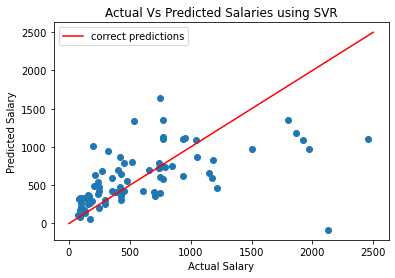

In [15]:
import matplotlib.pyplot as plt 
import numpy as np

# Scatterplot of predicted vs actual 

plt.scatter( y_test ,y_pred )

x = np.linspace(0,2500,2500)

plt.plot(x, x, '-r', label='correct predictions')

plt.title('Actual Vs Predicted Salaries using SVR')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.legend()
plt.show()

## 2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the [root-mean-squared-error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

RMSE Results in task 1 before feature reduction: 437.14115574476597             
                          
RMSE Results in task 2 n_components = 0.95: 450.1811170847414


We are trying to minimize RMSE, as this gives us the best fitting model. From the 2 models above, Task 1's feature reduction model would be expected to perform better than PCA with n_components set to retain 95% of the variance, as it has a lower RMSE. 

However 16 features are used in task 1, while 7 new features are used in PCA with n_components = 0.95. If we had massive amounts of data it might be faster to use PCA when considering computation time and costs, as the percentage difference in RMSE isn't that big (450.18 - 437.14 / 437.14 ) * 100  = 2.9% difference.

## 3. How about if we set the variance to 99%? And how about 99.9%?

In [16]:
# PCA set for 99% of variance  

pca = PCA(n_components=0.99)

X_train_scale_pca = pca.fit_transform(X_train_std)
X_test_scale_pca = pca.transform(X_test_std)

# quick print of shapes to see difference
print(f'Train data:\nBefore pca shape: {X_train_std.shape} , after pca applied: {X_train_scale_pca.shape} ')
print(f'\nTest data:\nBefore pca shape: {X_test_std.shape} , after pca applied: {X_test_scale_pca.shape} ')


# now applying to SVM 
svm_reg = SVR(kernel='linear')

# again using hint 2 from task 1 to reshape y data
svm_reg.fit(X_train_scale_pca , y_train_std.T[0])

y_pred_scale = svm_reg.predict(X_test_scale_pca)

# convert this back to non scaled values using inverse transform
y_pred = sc_y.inverse_transform(y_pred_scale)

print("\nSVR root mean square error: " , mean_squared_error(y_test, y_pred, squared = False) )

Train data:
Before pca shape: (184, 16) , after pca applied: (184, 11) 

Test data:
Before pca shape: (79, 16) , after pca applied: (79, 11) 

SVR root mean square error:  452.0371434562681


We can see the more variance we retain, the more features are required to retain this variance. The 99% variance retained RMSE actually performs worse than the 95% variance retained RMSE. However the difference is quite small.

In [17]:
# PCA set for 99.9% of variance  

pca = PCA(n_components=0.999)

X_train_scale_pca = pca.fit_transform(X_train_std)
X_test_scale_pca = pca.transform(X_test_std)

# quick print of shapes to see difference
print(f'Train data:\nBefore pca shape: {X_train_std.shape} , after pca applied: {X_train_scale_pca.shape} ')
print(f'\nTest data:\nBefore pca shape: {X_test_std.shape} , after pca applied: {X_test_scale_pca.shape} ')


# now applying to SVM 
svm_reg = SVR(kernel='linear')

# again using hint 2 from task 1 to reshape y data
svm_reg.fit(X_train_scale_pca , y_train_std.T[0])

y_pred_scale = svm_reg.predict(X_test_scale_pca)

# convert this back to non scaled values using inverse transform
y_pred = sc_y.inverse_transform(y_pred_scale)

print("\nSVR root mean square error: " , mean_squared_error(y_test, y_pred, squared = False) )

Train data:
Before pca shape: (184, 16) , after pca applied: (184, 14) 

Test data:
Before pca shape: (79, 16) , after pca applied: (79, 14) 

SVR root mean square error:  432.086107442418


We can keep 99.9% of the variance with 14 features using PCA. The model performs better on the test data wrt to RMSE, but we require more features to retain this 99.9% variance.   

Then

1. In a loop, set the number of components to keep from 1 to the total number of features
2. In each iteration, train an SVM regression (linear and default parameters)
3. In each iteration, calculate and record the RMSE
4. Plot the RMSE values per number of features

Discuss:

1. How does this compare to the the graphs of RMSE values from Task 1?

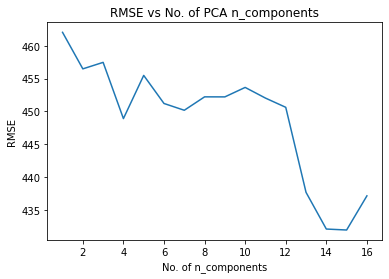

In [18]:
list_of_rmse_pca = []

for k in range(1,X_train_std.shape[1]+1):
    
    # initialize pca with number of k features
    
    pca = PCA(n_components= k)
    
    # fit to and transform train & test data
    X_train_scale_pca = pca.fit_transform(X_train_std)
    X_test_scale_pca = pca.transform(X_test_std)
    
    # initalize SVM reg
    svm_reg_2 = SVR(kernel='linear')
    
    # fit to train data 
    svm_reg_2.fit(X_train_scale_pca , y_train_std.T[0])
    
    # predict on test data
    y_pred_scale = svm_reg_2.predict(X_test_scale_pca)
    
    # return inverse to bring back to original scale
    y_pred = sc_y.inverse_transform(y_pred_scale)
    
    # calculating rmse
    rmse = mean_squared_error(y_test, y_pred, squared = False) 
    
    # append score for this run
    list_of_rmse_pca.append(rmse)

    
# plotting results
x = np.arange(1, X_train_std.shape[1]+1, 1)
plt.plot(x, list_of_rmse_pca)
plt.title("RMSE vs No. of PCA n_components")
plt.xlabel("No. of n_components")
plt.ylabel("RMSE")
plt.show()

In [19]:
# Best RMSE value from the plot
print(min(list_of_rmse_pca))

431.938442779775


## 1. How does this compare to the the graphs of RMSE values from Task 1?

RMSE Results in task 1 after feature reduction for k features: RMSE values ranged between just under 440 and just over 520. Ranging over how many features were used of the original 16 

Best RMSE from the run, 14 features used = 434.98454933162515
                    
<br>               
                    

RMSE Results in task 2 after pca of k components: RMSE values ranged between just under 435 and just over 460 depending on how many components were used in PCA. 

Best RMSE from the run, 15 features used = 431.938442779775

<br>

**Conculsions**: We are trying to minimize RMSE, as this gives us the best fitting model. So choosing PCA with 15 components would minimize the RMSE, with a score of 431.938442779775. On average we are off by 431.9 * 1000 = $431'900. As this is orignal variable salary (in thousands). 
 
However, we may lose interprebility when using PCA on the features. This could be weighted up against the improvement of the RMSE. Is the difference of approx 3 in RMSE ( a percentage change of (431.938 - 434.984 / 434.984 ) * 100 = 0.7% )  worth using PCA. As with feature reduction, we keep original variables and we can see what features directly influence the predictions. PCA brings the features to a new scale and interprebility can be lost. 

It might be of interest to use feature reduction in this case, as interpribablity can be an important factor in models.